# Decision Tree
In this chapter we will show you how to make a "Decision Tree". A Decision Tree is a Flow Chart, and can help you make decisions based on previous experience.

In the example, a person will try to decide if he/she should go to a comedy show or not.

Luckily our example person has registered every time there was a comedy show in town, and registered some information about the comedian, and also registered if he/she went or not.

In [1]:
import pandas

df = pandas.read_csv("data.csv")

print(df)

    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES


To make a decision tree, all data has to be numerical.

We have to convert the non numerical columns 'Nationality' and 'Go' into numerical values.

Pandas has a `map()` method that takes a dictionary with information on how to convert the values.

`{'UK': 0, 'USA': 1, 'N': 2}`

Means convert the values 'UK' to 0, 'USA' to 1, and 'N' to 2.

In [2]:
# Change string values into numerical values:

d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

print(df)

    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


In [3]:
# X is the feature columns, y is the target column:

features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

print(X)
print(y)

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


Now we can create the actual decision tree, fit it with our details. Start by importing the modules we need:

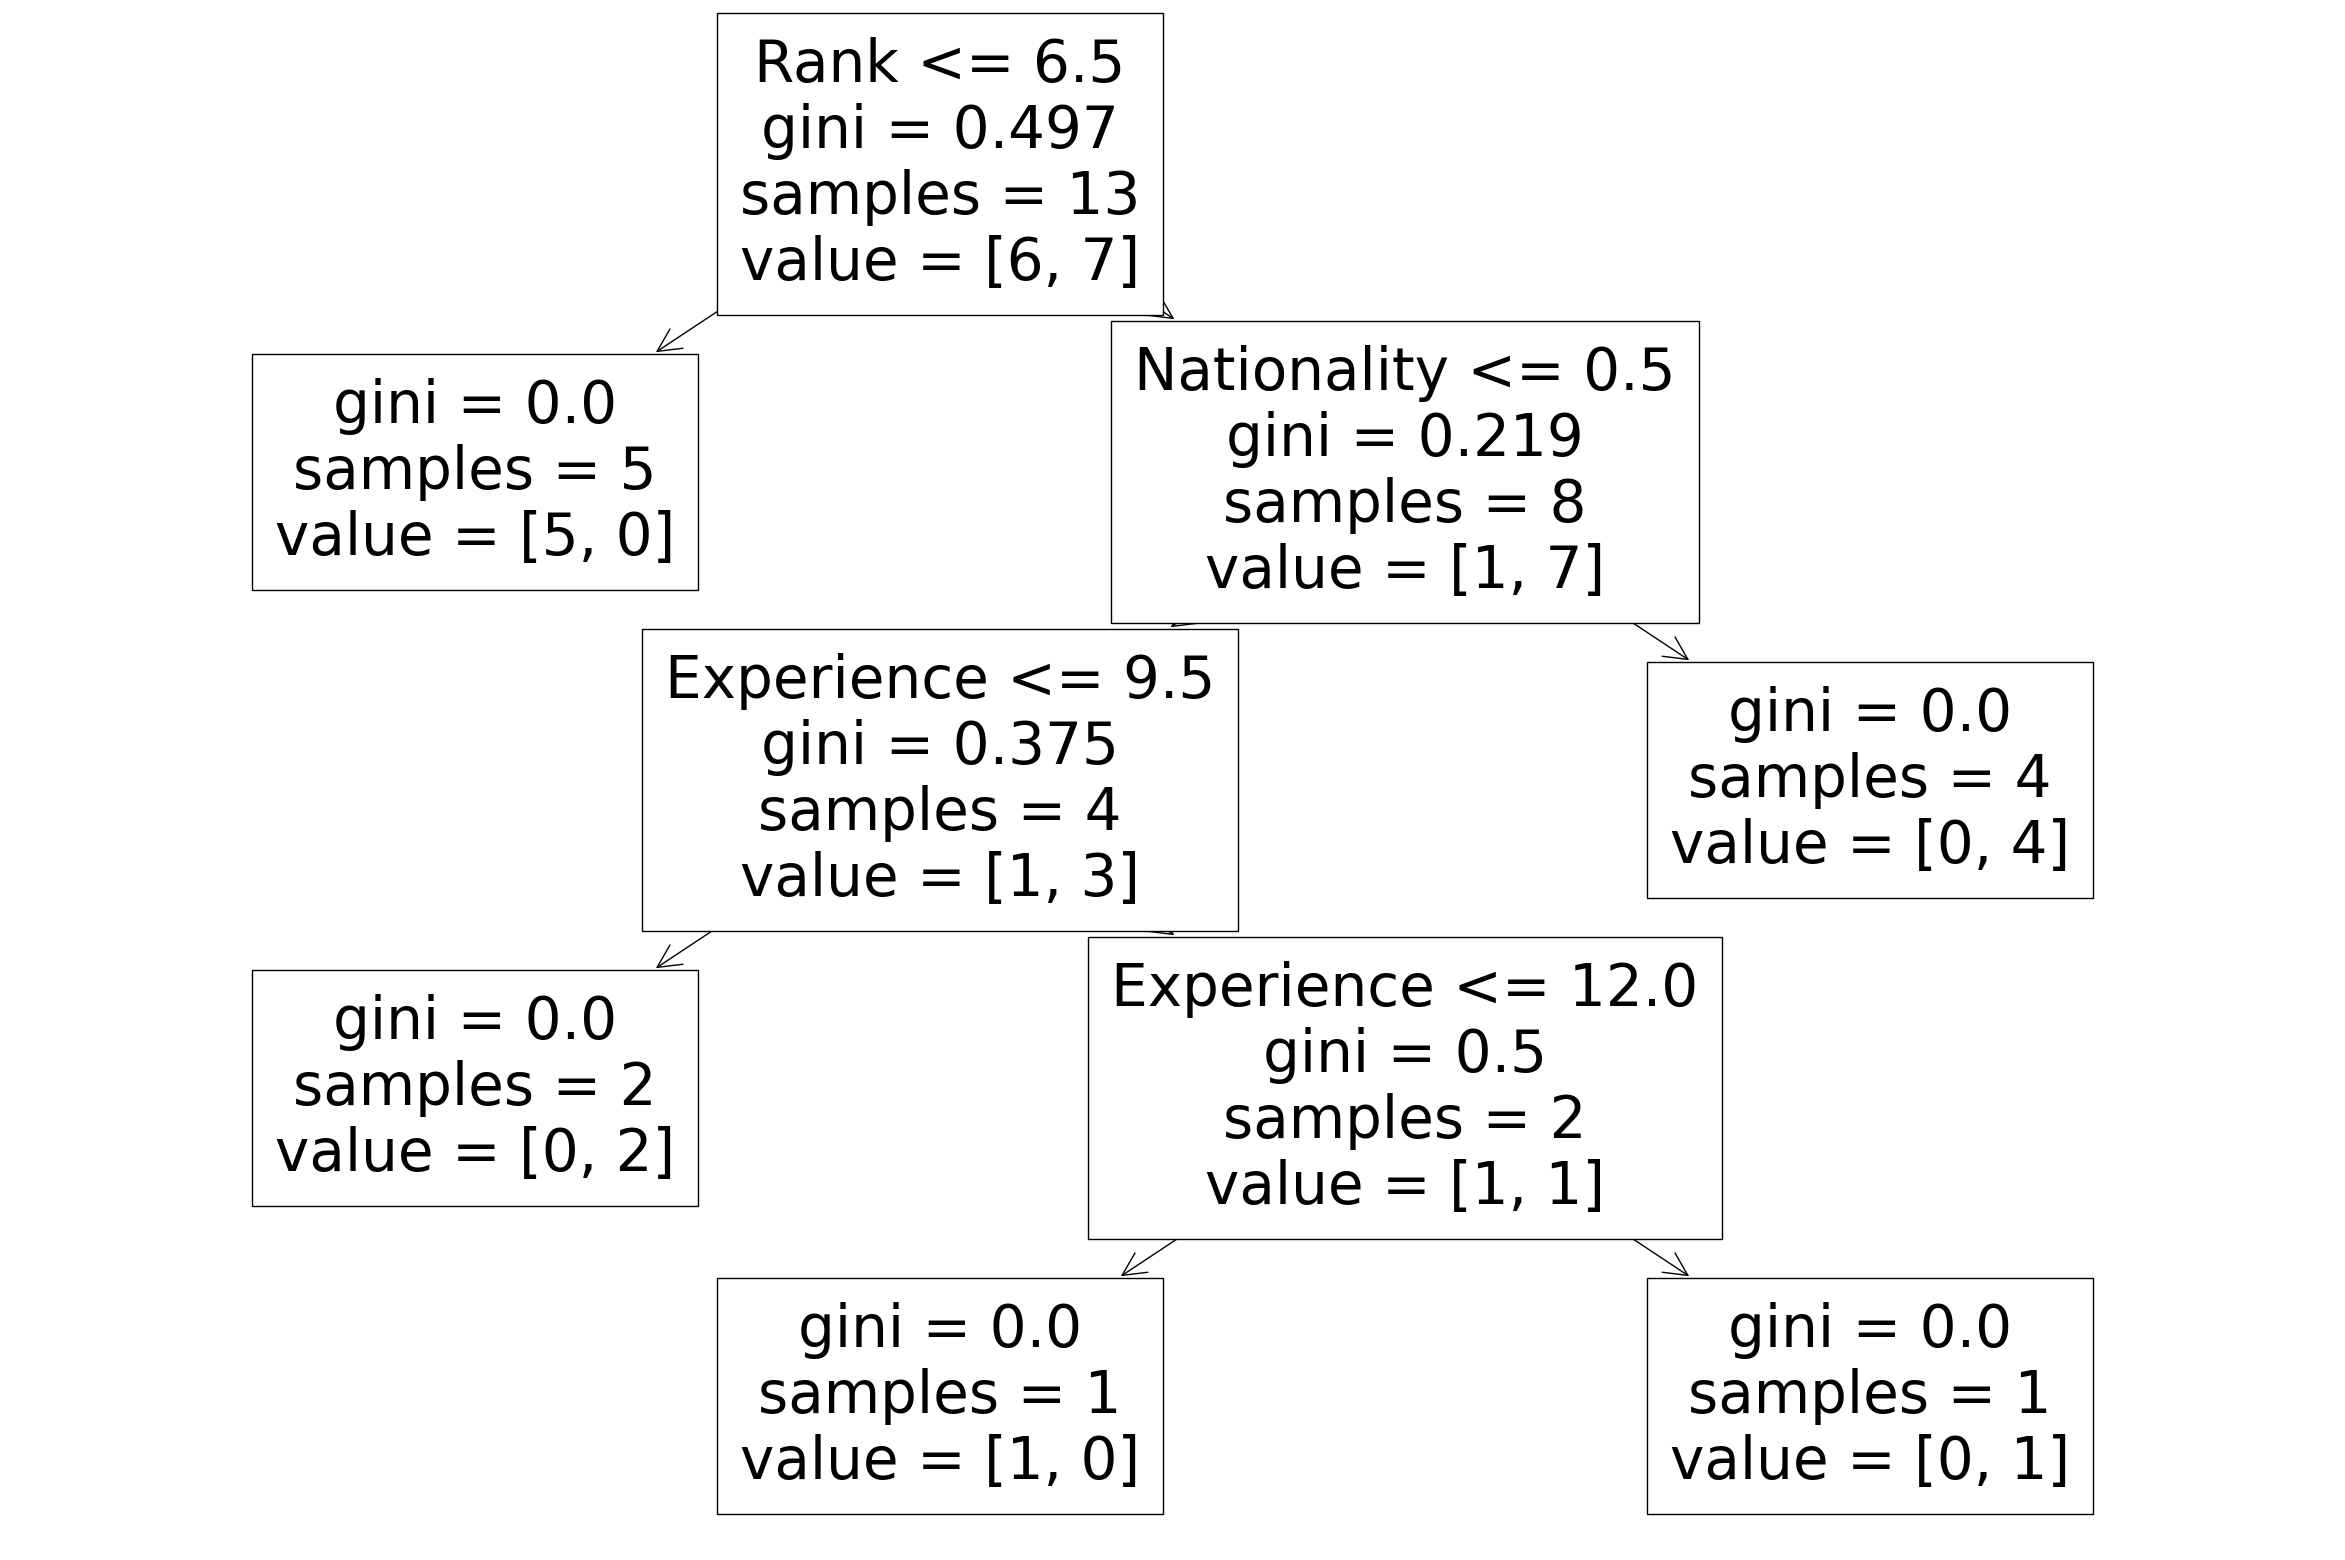

In [11]:
# Create and display a Decision Tree:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

import matplotlib.pyplot as plt

plt.figure(figsize=(30, 20))  # Adjust the figsize as desired
tree.plot_tree(dtree, feature_names=features)
plt.show()

### Gini
There are many ways to split the samples, we use the GINI method in this tutorial.

The Gini method uses this formula:

`Gini = 1 - (x/n)2 - (y/n)2`

Where x is the number of positive answers("GO"), n is the number of samples, and y is the number of negative answers ("NO"), which gives us this calculation:

`1 - (7 / 13)2 - (6 / 13)2 = 0.497`

https://www.w3schools.com/python/python_ml_decision_tree.asp

# Predict Values
We can use the Decision Tree to predict new values.

Example: Should I go see a show starring a 40 years old American comedian, with 10 years of experience, and a comedy ranking of 7?

In [5]:
# Use predict() method to predict new values:

print(dtree.predict([[40, 10, 7, 1]]))

[1]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [6]:
# What would the answer be if the comedy rank was 6?

print(dtree.predict([[40, 10, 6, 1]]))

[0]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
